<a href="https://colab.research.google.com/github/AvoCatDogg/Quantum_computing/blob/main/VQA2023_note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import

In [1]:
!pip install PennyLane
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 72.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 50.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: autograd
    Found existing installation: autograd 1.6.1
    Uninstalling autograd-1.6.1:
      Successfully uninstalled autograd-1.6.1


In [2]:
import numpy as np

#2023-07-03 월요일

##**I.1 All About qubits**
---

양자컴퓨터는 오늘날 슈퍼컴퓨터에서도 다루기 힘든 문제를 해결 가능한 놀라운 잠재력을 가진 기술이다.

오늘날 우리가 사용하는 고전적인 컴퓨터는 정보를 bit로 나타낸다. bit는 0혹은 1을 가지는 이진수 값이며, 이 두 상태는 물리적으로 두가지 다른 상태를 지닌다.

예를들어 전자부품을 통과하는 전압은 비트를 나타내는데 있어, 어떤 임계값을 선택하여 해당 임계값 아래로는 0의 bit를, 임계값 이후로는 1의 bit를 표시하는 방법으로 bit를 표현 가능하다.

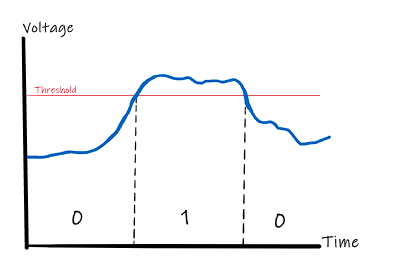



양자컴퓨터의 잠재력은 정보를 조작하고 표현하는데 다른 방식을 사용하는것에서 나타난다.
양자컴퓨터는 qubit라 불리는 특별한 bit를 사용한다.
bit와 마찬가지로, qubit또한 bit와 같이 물리적인것에 해당하지만, 이 문서에서는 qubit의 소프트웨어적인 부분과 알고리즘의 관점에서 이론에 초점을 맞출것이다.
우리가 핵심적으로 볼 요소는:


1.   qubit의 state의 수학적인 표현
2.   qubit가 어떤 상태에 있는지 결정하기 위한 qubit측정  방법
3.   계산을 수행하기위해서 state를 조작하는 방법



###Codercise

In [ ]:
'''
codercise I.1.1
'''

# Here are the vector representations of |0> and |1>, for convenience
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])

print(np.conjugate(ket_0))

def normalize_state(alpha, beta):
    """Compute a normalized quantum state given arbitrary amplitudes.

    Args:
        alpha (complex): The amplitude associated with the |0> state.
        beta (complex): The amplitude associated with the |1> state.

    Returns:
        array[complex]: A vector (numpy array) with 2 elements that represents
        a normalized quantum state.
    """
    psi = alpha * ket_0 + beta * ket_1
    c = alpha * alpha.conjugate() + beta * beta.conjugate()
    psi_n = psi/c

    return psi_n

'''
codercise I.1.2
'''

def inner_product(state_1, state_2):
    """Compute the inner product between two states.

    Args:
        state_1 (array[complex]): A normalized quantum state vector
        state_2 (array[complex]): A second normalized quantum state vector

    Returns:
        complex: The value of the inner product <state_1 | state_2>.
    """
    result = np.dot(np.conj(state_1).T, state_2)
    return  result

# Test your results with this code
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])

print(f"<0|0> = {inner_product(ket_0, ket_0)}")
print(f"<0|1> = {inner_product(ket_0, ket_1)}")
print(f"<1|0> = {inner_product(ket_1, ket_0)}")
print(f"<1|1> = {inner_product(ket_1, ket_1)}")

'''
codercise I.1.3
'''
def measure_state(state, num_meas):
    """Simulate a quantum measurement process.

    Args:
        state (array[complex]): A normalized qubit state vector.
        num_meas (int): The number of measurements to take

    Returns:
        array[int]: A set of num_meas samples, 0 or 1, chosen according to the probability
        distribution defined by the input state.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # COMPUTE THE MEASUREMENT OUTCOME PROBABILITIES

    # RETURN A LIST OF SAMPLE MEASUREMENT OUTCOMES

    a = state[0]
    b = state[1]
    pro = [abs(a)**2,abs(b)**2]
    result = np.random.choice([0,1], p = pro, size = num_meas)

    return np.array(result)


[1 0]
<0|0> = 1
<0|1> = 0
<1|0> = 0
<1|1> = 1



##**I.2 Quantum circuit**
---





내용

###Codercise

---

**codercise I.2.1**

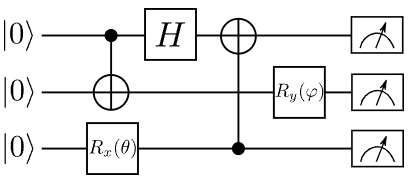



위 회로를 코드를 아래 코드를 통해 구상하라.

```python
import pennylane as qml

def my_circuit(theta, phi):

    qml.CNOT(wires = [0,1])
    qml.RX(theta, wires = 2)
    qml.Hadamard(wires = 0)
    qml.CNOT(wires = [2,0])
    qml.RY(phi, wires = 1)

    return qml.probs(wires = [0,1,2])
```

---
**codercise I.2.2**

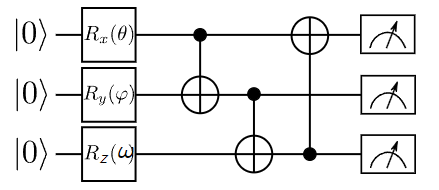

위 회로를 pennylane을 통해 완성해라.

그리고 나서 QNODE를 만들고 주어진 device인 "default.qubit"에서 회로를 실행해라.

```python
import pennylane as qml

dev = qml.device("default.qubit", wires = 3)

def my_circuit(theta, phi, omega):

    qml.RX(theta, wires = 0)
    qml.RY(phi, wires = 1)
    qml.RZ(omega, wires = 2)
    qml.CNOT(wires = [0,1])
    qml.CNOT(wires = [1,2])
    qml.CNOT(wires = [2,0])

    return qml.probs(wires = [0, 1, 2])

my_qnode = qml.QNode(my_circuit, dev)

theta, phi, omega = 0.1, 0.2, 0.3

my_qnode(theta, phi, omega)
```
```
결과
tensor([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
        2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03], requires_grad=True)
```

---
**codercise I.2.3**

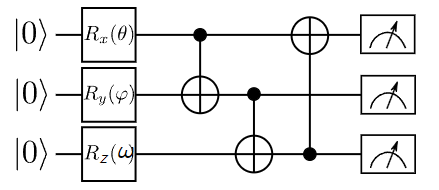

이 양자회로는 이전 문제에서의 회로를 실행한다.

decorator를 이용해서 위 quantum function을 QNode롤 구현하고, 제공된 input parameter들에 대해서 실행해라.

```python
import pennylane as qml

@qml.qnode(dev)
def my_circuit(theta, phi, omega):

    qml.RX(theta, wires = 0)
    qml.RY(phi, wires = 1)
    qml.RZ(omega, wires = 2)
    qml.CNOT(wires = [0, 1])
    qml.CNOT(wires = [1, 2])
    qml.CNOT(wires = [2, 0])

    return qml.probs(wires = [0, 1, 2])

theta, phi, omega = 0.1, 0.2, 0.3

my_circuit(theta, phi, omega)
```
```
결과
tensor([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
        2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03], requires_grad=True)
```

---
**codercise I.2.4**

codercise I.2.3 회로의 depth는 얼마인가?

```python
import pennylane as qml

dev = qml.device("default.qubit", wires = 3)

@qml.qnode(dev)
def my_circuit(theta, phi, omega):
    qml.RX(theta, wires = 0)
    qml.RY(phi, wires = 1)
    qml.RZ(omega, wires = 2)
    qml.CNOT(wires = [0,1])
    qml.CNOT(wires = [1,2])
    qml.CNOT(wires = [2,0])
    return qml.probs(wires=[0, 1, 2])

depth = 4
```
depth는 4임을 알 수 있다.

##**1.3 Unitary matrices**


내용

####Codercise

---
**codercise I.3.1**

다음과 같이 정의된 unitary matrix "U" 를 qubit 적용한 회로를 구상하고 state를 return해라.

$$U = {1\over\sqrt{2}}\left(
\begin{matrix}
    1 & 1 \\
    1 & -1 \\
\end{matrix}
\right) $$


```python
import pennylane as qml

U = np.array([[1, 1],[1, -1]]) / np.sqrt(2)

@qml.qnode(dev)
def apply_u():

    qml.QubitUnitary(U, wires = 0)
    return qml.state()
```

---
**codercise I.3.2**

input parameters을 이용해서 Rot Operator를 qubit에 적용하고, Qnode를 완성한 뒤에, qml.state를 이용해서 quantum state vector를 return해라.
Rot operator는 다음과 같다.

$$ U(\phi, \theta, \omega) = \left(
\begin{matrix}
    e^{-i(\phi+\omega)/2}\cos(\theta/2) & -e^{i(\phi+\omega)/2}\sin(\theta/2) \\
    e^{-i(\phi+\omega)/2}\sin(\theta/2) & e^{i(\phi+\omega)/2}\cos(\theta/2) \\
\end{matrix}
\right) $$



```python
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_u_as_rot(phi, theta, omega):
    
    qml.Rot(phi, theta, omega, wires = 0)
    return qml.state()
```


